<a href="https://colab.research.google.com/github/BrunoFNoob/Projeto_Energia_DS/blob/main/projeto_energia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importações Iniciais para leitura dos CSV's

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce



### Importação de todos os CSV's e Análise dos dados gerais

In [ ]:
# Todos os CSV's à serem lidos:
todos_csv = [r'c:\Users\bruno\Downloads\GERACAO_USINA_2000.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2001.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2002.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2003.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2004.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2005.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2006.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2007.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2008.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2009.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2010.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2011.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2012.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2013.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2014.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2015.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2016.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2017.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2018.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2019.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2020.csv']

# Transformando em Dataframe
dataframes = [pd.read_csv(arquivo, delimiter=";") for arquivo in todos_csv]

# Transfomando a coluna 'din_instante' em DateTime e as colunas Object restantes em String.
for df in dataframes:
    df['din_instante'] = pd.to_datetime(df['din_instante'])
    for coluna in df.columns:
        if df[coluna].dtype == 'object':
            df[coluna] = df[coluna].astype('string')

# Concatenando os Dataframes
df_final = pd.concat(dataframes, ignore_index=True)

# Salvando o Dataframe
df_final.to_csv("arquivo_conct.csv", index=False)


In [ ]:
df_final.info()
#DICIONARIO DE DADOS : 'din_instante' Tem que ser Datetime, 'val_geracao' tem que ser float e o resto Texto.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54335427 entries, 0 to 54335426
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   din_instante            datetime64[ns]
 1   id_subsistema           string        
 2   nom_subsistema          string        
 3   id_estado               string        
 4   nom_estado              string        
 5   cod_modalidadeoperacao  string        
 6   nom_tipousina           string        
 7   nom_tipocombustivel     string        
 8   nom_usina               string        
 9   ceg                     string        
 10  val_geracao             float64       
 11  id_ons                  string        
dtypes: datetime64[ns](1), float64(1), string(10)
memory usage: 4.9 GB


In [ ]:
df_final.isnull().sum()
#DICIONARIO DE DADOS : Apenas  'cod_modalidadeoperacao' e 'ceg' permitem valor NULO.

din_instante                     0
id_subsistema                    0
nom_subsistema                   0
id_estado                        0
nom_estado                       0
cod_modalidadeoperacao          24
nom_tipousina                    0
nom_tipocombustivel              0
nom_usina                        0
ceg                              0
val_geracao                 164361
id_ons                    48399748
dtype: int64

In [ ]:
# Visualização de quantos nulos
nulos_vg = df_final['val_geracao'].isnull().sum()
valor_total = len(df_final)
percentual_nulos = (nulos_vg/valor_total)*100
print('Percentual de valores nulos nos valores de geração = ', round(percentual_nulos,1) , "%")


Percentual de valores nulos nos valores de geração =  0.3 %


In [ ]:
# Visualização de quantos nulos

nulos_Id = df_final['id_ons'].isnull().sum()
valor_total = len(df_final)
percentual_nulos = (nulos_Id/valor_total)*100
print('Percentual de valores nulos nos Ids = ', round(percentual_nulos,1) , "%")


Percentual de valores nulos nos valores de geração =  89.1 %


### Escolha da Ideia.

O Ceará é apontado como quarto maior produtor de energia eólica do país, onde a produção de energia eólica mais do que dobra no Ceará no segundo semestre de todos os anos. Analisemos.

fontes:
- https://www.estadao.com.br/economia/energia-eolica-ranking-estados-brasil-veja-nprei/
- https://focus.jor.br/ceara-e-o-4o-maior-produtor-de-energia-eolica-do-pais-diz-aneel/
- https://g1.globo.com/ce/ceara/noticia/2023/08/16/apontado-como-possivel-local-de-origem-do-apagao-ceara-tem-boom-na-geracao-de-energia-no-mes-de-agosto.ghtml#:~:text=A%20produ%C3%A7%C3%A3o%20de%20energia%20e%C3%B3lica,compara%C3%A7%C3%A3o%20com%20o%20primeiro%20semestre.

### Quanto a geração eólica :

In [ ]:
eolica = df_final[df_final['nom_tipocombustivel'] == 'Eólica']
#Criação de Dataframe, para visualizar históricamente, os maiores produtores de energia eólica.

In [ ]:
eolica = eolica.groupby('id_estado')['val_geracao'].sum()
#Agrupando por estado, a somatória dos valores de geração.

In [ ]:
eolica = pd.DataFrame(eolica)
#criando um pequeno dataframe, para ordená-lo

In [ ]:
eolica = eolica.sort_values(by = 'val_geracao', ascending=False)
#Ordenando por valor gerado.

In [ ]:
eolica
#Ceará fica em terceiro lugar em geração eólica nesse dataset (00-20)!!!

,val_geracao
id_estado,
RN,8.054264e+07
BA,6.546469e+07
CE,3.725195e+07
RS,3.580932e+07
PI,2.583410e+07
PE,1.321311e+07
MA,4.912331e+06
SC,2.295898e+06


### análise do segundos semestres do ceará

In [ ]:
df_CE = df_final[df_final['id_estado']=='CE']
# Criação do DF próprio do Ceará

In [ ]:
df_CE.nom_tipocombustivel.value_counts()
#Eólica em destaque

nom_tipocombustivel
Eólica                  1592525
Óleo Diesel             1308671
Gás                      312864
Carvão                   142907
Óleo Combustível          88120
Resíduos Industriais      39381
Fotovoltaica              35807
Name: count, dtype: Int64

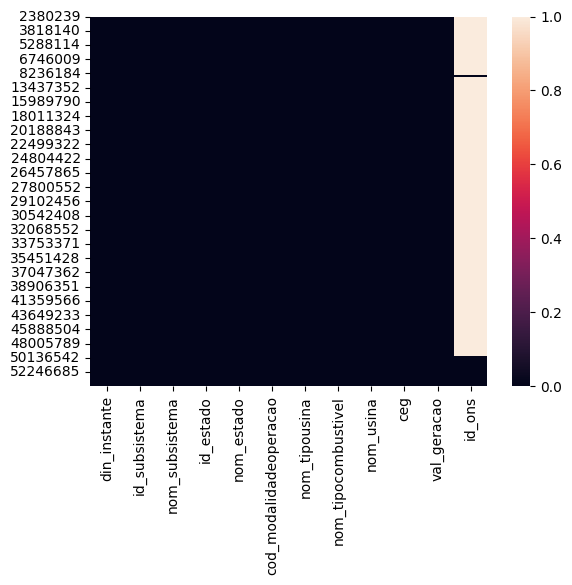

In [ ]:
sns.heatmap(df_CE.isnull());
# Percebe-se que o estado do Ceará tem apenas valores nulos nos id_ons

In [ ]:
df_CE.val_geracao.value_counts()
#Percebe-se muito valor zerado.

val_geracao
0.0000      1611493
7.0000         4257
5.0000         3593
4.0000         3156
0.9700         2807
             ...   
8.1648            1
332.8100          1
20.1336           1
37.6808           1
182.5480          1
Name: count, Length: 262095, dtype: int64

### Encodar para visualizar as correlações

In [ ]:
import category_encoders as ce
#utilização de um encoder que lida com valores nulos presentes.
encodar = ce.OrdinalEncoder()
str_encodado = encodar.fit_transform(df_CE[['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado', 'cod_modalidadeoperacao', 'nom_tipousina', 'nom_tipocombustivel', 'nom_usina', 'ceg', 'id_ons']])
# encodando as colunas str

In [ ]:
colunas = ['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado', 'cod_modalidadeoperacao', 'nom_tipousina', 'nom_tipocombustivel', 'nom_usina', 'ceg', 'id_ons']
df_CE = df_CE.drop(colunas, axis=1)
#dropando as já presentes

In [ ]:
df_CE = pd.concat([df_CE, str_encodado], axis=1)
#concatenação dos encodados com df central

In [ ]:
df_CE.head()
# Agora não temos mais str, podendo fazer a correlação

,din_instante,val_geracao,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,ceg,id_ons
32396187,2015-12-01 00:00:00,0.0,1,1,1,1,1,1,1,1,1,2
32396686,2015-12-01 01:00:00,0.0,1,1,1,1,1,1,1,1,1,2
32397170,2015-12-01 02:00:00,0.0,1,1,1,1,1,1,1,1,1,2
32397663,2015-12-01 03:00:00,0.0,1,1,1,1,1,1,1,1,1,2
32398124,2015-12-01 04:00:00,0.0,1,1,1,1,1,1,1,1,1,2


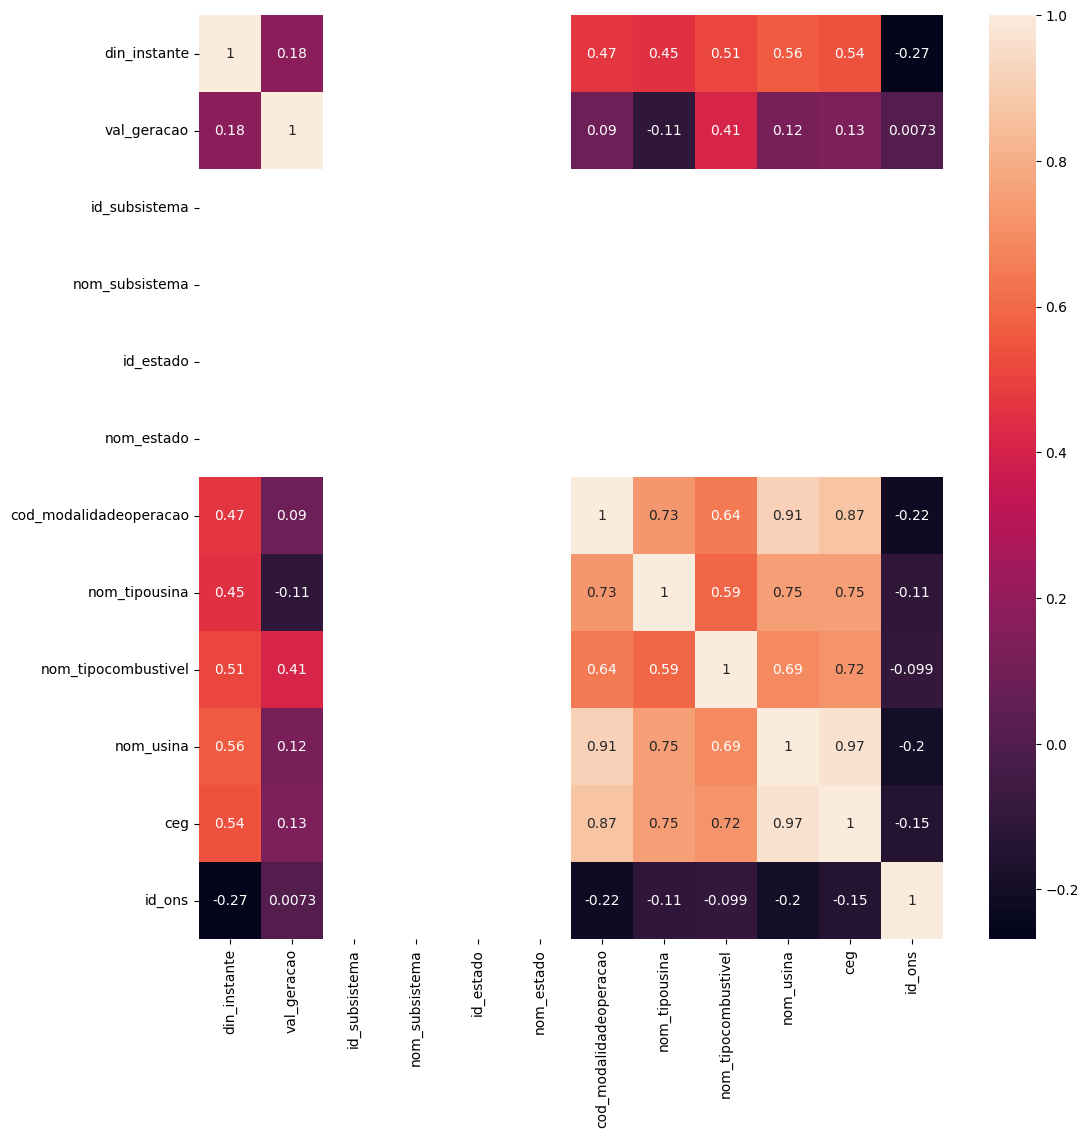

In [ ]:
correlacao = df_CE.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlacao, annot = True);
#Podemos dropar as 4 colunas em branco, pois essas tem sempre o mesmo valor, já que sempre é no Ceará,
# que sempre será no nordete.

In [ ]:
colunas = ['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado']
df_CE = df_CE.drop(colunas, axis=1)
# retirando as colunas que não agregam.

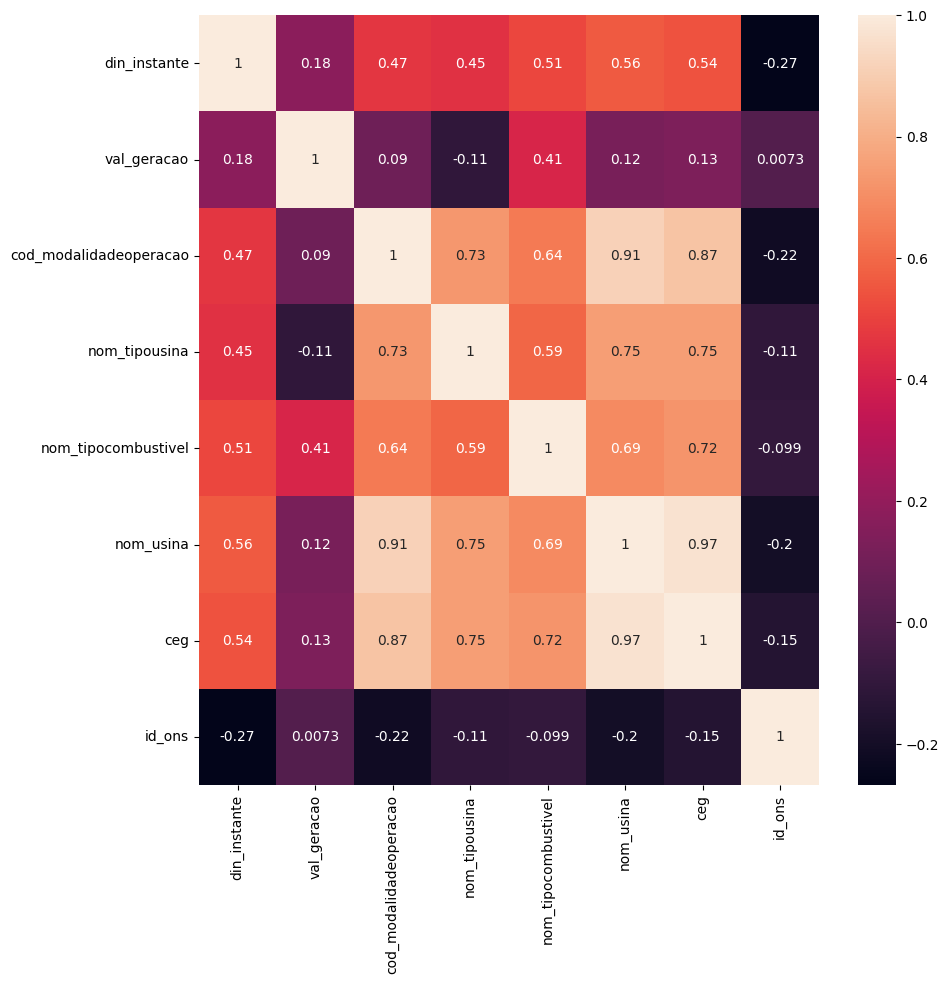

In [ ]:
correlacao = df_CE.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlacao, annot = True);
#Quanto ao valor da geração, podemos ver uma correlação fraca, mas existente entre esse índice e o tipo de combustível
# 0.3 a 0.5 positivo indica uma correlação fraca

In [ ]:
# Documento BOOTCAMP : Apesar da granularidade horária dos dados, o modelo deve focar em previsões na frequência mensal.
df_CE['Ano'] = pd.DatetimeIndex(df_CE['din_instante']).year
df_CE['Mes'] = pd.DatetimeIndex(df_CE['din_instante']).month

Text(0.5, 1.0, 'Geração de Energia por mês')

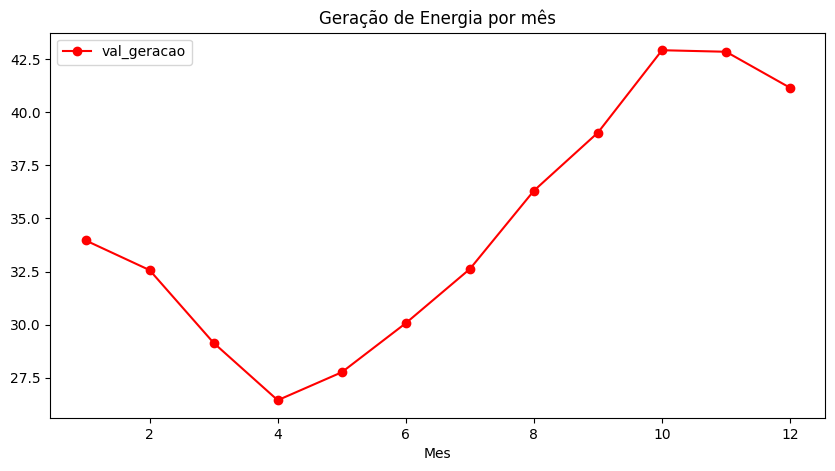

In [ ]:
axis = df_CE.groupby('Mes')[['val_geracao']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Geração de Energia por mês')
# Pode-se perceber visualmente, que de fato,
# a produção de energia eólica mais do que dobra no Ceará no segundo semestre de todos os anos

Text(0.5, 1.0, 'Geração de Energia por Ano')

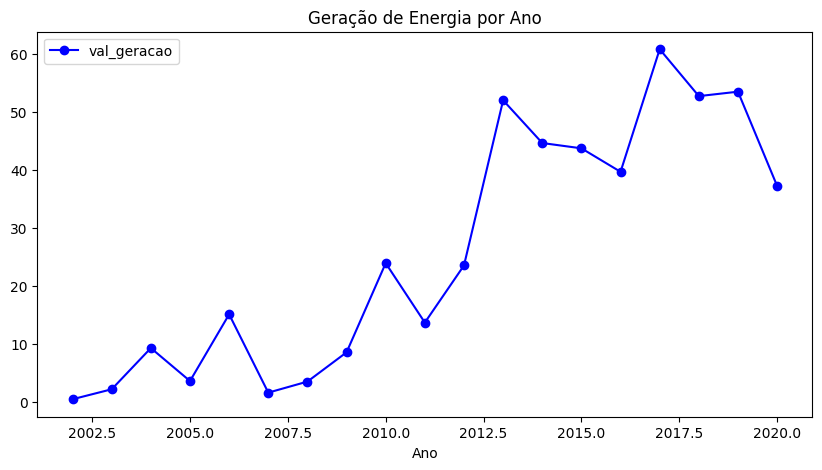

In [ ]:
axis = df_CE.groupby('Ano')[['val_geracao']].mean().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Geração de Energia por Ano')
#primeira visualização anual da geração de energia total no ceará

### Utilização do Prophet para predição.

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objects as go
from prophet.plot import plot_plotly, plot_components_plotly

c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


###  Como foi escolhido o ceará e a energia eólica, traremos o maior produtor de energia eolica do CE.


In [ ]:
# diminuimos o escopo.
df_Ceara_eolica = df_final[
    (df_final['id_estado']=='CE') &
    (df_final['nom_tipocombustivel']=='Eólica')
]


In [ ]:
# criamos um df para esse grupo, para então avaliar o maior gerador de energia.
maior_P = df_Ceara_eolica.groupby('nom_usina')['val_geracao'].sum()
maior_P = pd.DataFrame(maior_P)

In [ ]:
# ordenando-o para descobrir o maior gerador de eólica do ceará.
maior_P = maior_P.sort_values(by = 'val_geracao', ascending=False)
maior_P.head()

,val_geracao
nom_usina,
Conj. Itarema V,3.626739e+06
Conj. Trairí,3.417031e+06
Praia Formosa,2.868731e+06
Conj. Faísa,2.405421e+06
Icaraizinho,2.306034e+06


In [ ]:
# Criando o df apenas do Conj. Itarema.
itarema = df_Ceara_eolica[df_Ceara_eolica['nom_usina'] == 'Conj. Itarema V']

In [ ]:
#fazendo-o passar pelo mesmo processo do df_CE
encodar = ce.OrdinalEncoder()
str_encodado = encodar.fit_transform(itarema[['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado', 'cod_modalidadeoperacao', 'nom_tipousina', 'nom_tipocombustivel', 'nom_usina', 'ceg', 'id_ons']])
colunas = ['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado', 'cod_modalidadeoperacao', 'nom_tipousina', 'nom_tipocombustivel', 'nom_usina', 'ceg', 'id_ons']
itarema = itarema.drop(colunas, axis=1)
itarema = pd.concat([itarema, str_encodado], axis=1)
colunas = ['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado']
itarema = itarema.drop(colunas, axis=1)

In [ ]:
dataset_ita = itarema[['din_instante', 'val_geracao']].rename(columns = {'din_instante': 'ds', 'val_geracao': 'y'})

,ds,y
32396187,2015-12-01 00:00:00,0.000
32396686,2015-12-01 01:00:00,0.000
32397170,2015-12-01 02:00:00,0.000
32397663,2015-12-01 03:00:00,0.000
32398124,2015-12-01 04:00:00,0.000
...,...,...
54332985,2020-12-31 19:00:00,157.182
54333491,2020-12-31 20:00:00,130.595
54334007,2020-12-31 21:00:00,127.022
54334523,2020-12-31 22:00:00,143.791


In [ ]:
dataset_ita = dataset_ita.sort_values(by = 'ds')

In [ ]:
train_dataset = dataset_ita[dataset_ita['ds'] < '2019-01-01 00:00:00'] #apenas até o fim de 2018.
test_dataset = dataset_ita[dataset_ita['ds'] >= '2019-01-01 00:00:00'] #conjunto que demonstra a realidade de 19-20.

In [ ]:
model = Prophet()
model.fit(train_dataset)
# chamando o Prophet e fitando na base de dados escolhida.

19:51:33 - cmdstanpy - INFO - Chain [1] start processing
19:51:44 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# pedindo em horas o mês de janeiro.
futuro = model.make_future_dataframe(periods=744, freq='h')
previsao = model.predict(futuro)
#definindo a previsão

In [ ]:
futuro.tail() # demonstrando que vai até o fim de janeiro.

,ds
27544,2019-01-31 19:00:00
27545,2019-01-31 20:00:00
27546,2019-01-31 21:00:00
27547,2019-01-31 22:00:00
27548,2019-01-31 23:00:00


In [ ]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # valores esperados para o momento do dia.

,ds,yhat,yhat_lower,yhat_upper
27544,2019-01-31 19:00:00,53.341983,10.051124,94.760916
27545,2019-01-31 20:00:00,49.928184,8.542411,92.515085
27546,2019-01-31 21:00:00,46.554498,6.074415,88.494359
27547,2019-01-31 22:00:00,42.282920,2.098670,83.955003
27548,2019-01-31 23:00:00,37.443838,-5.139614,79.758157


c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


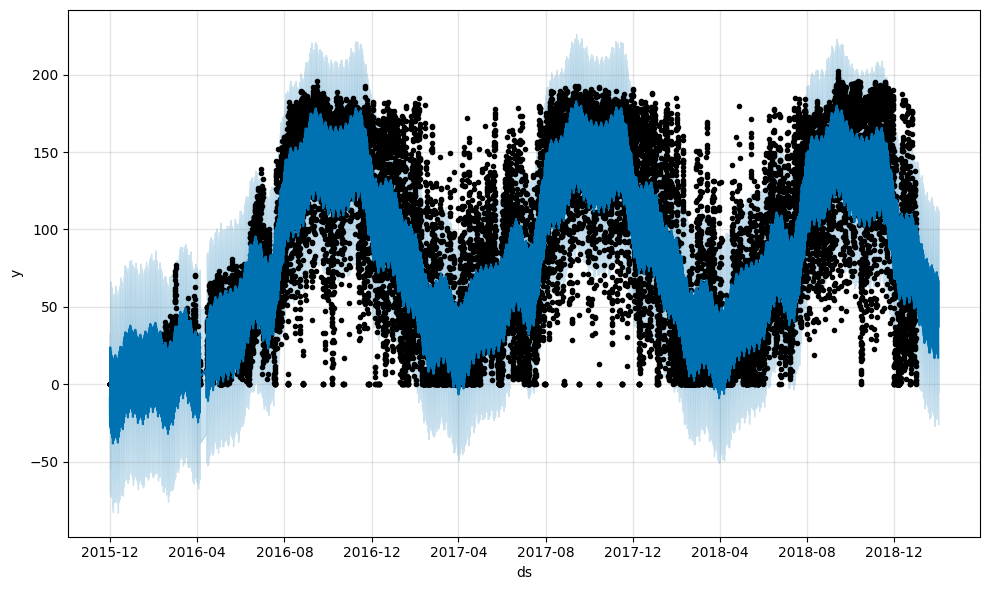

In [ ]:
figura1 = model.plot(previsao)
# Mostrando o modelo se adaptando aos dados.

c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Serie

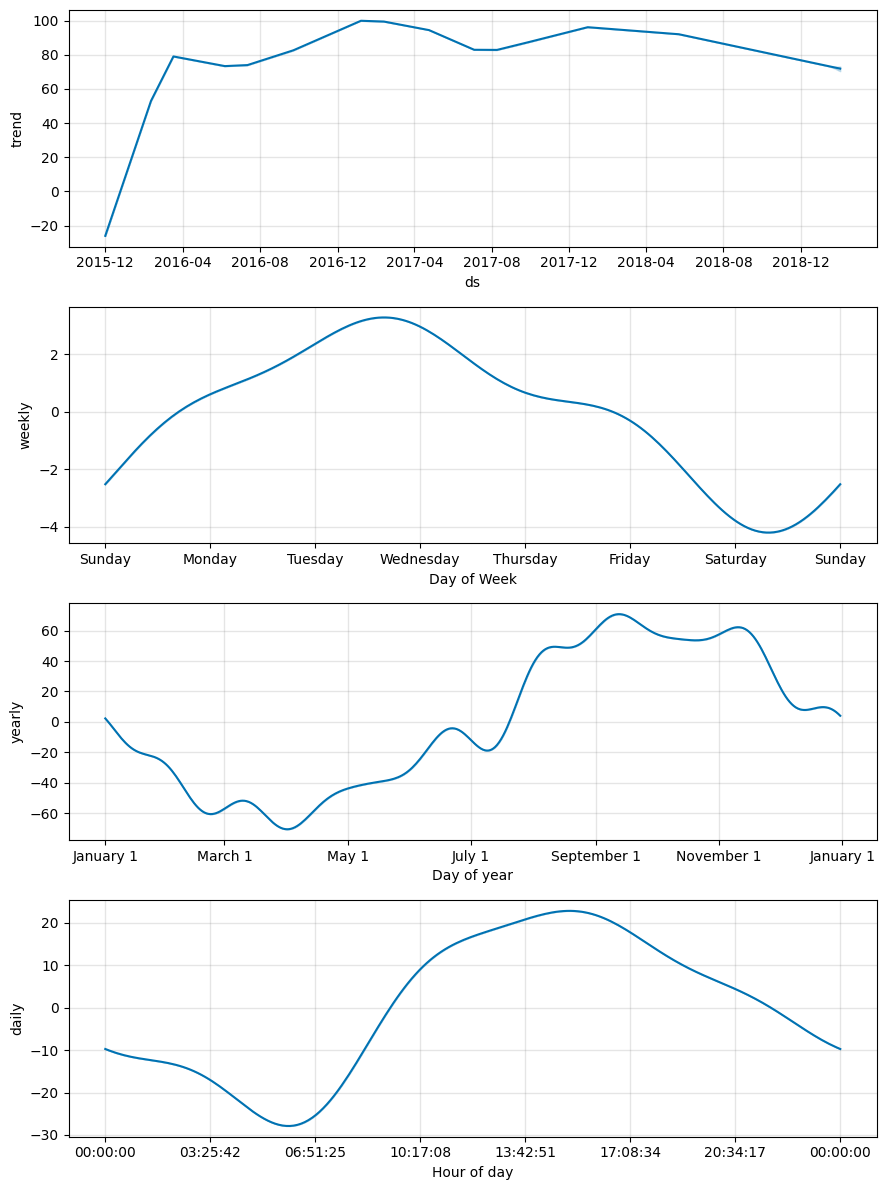

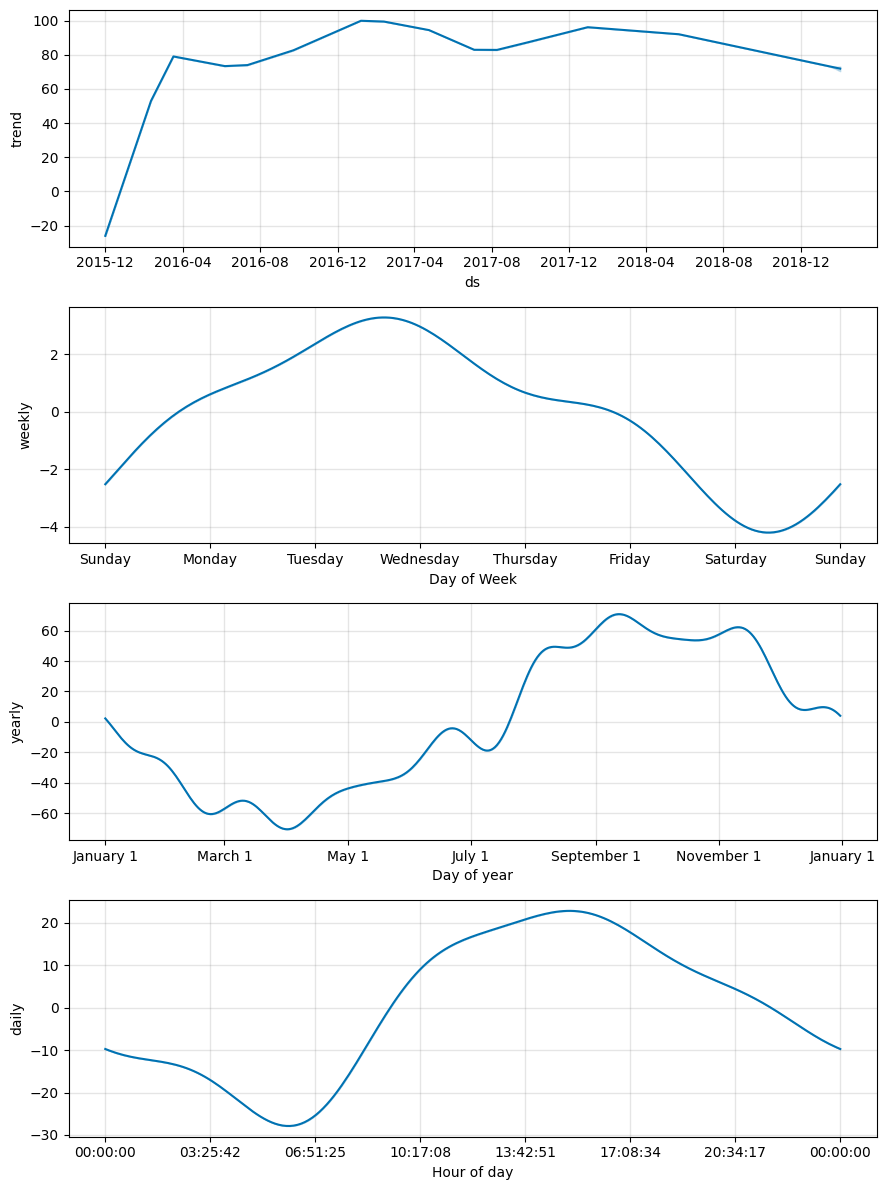

In [ ]:
figura2 = model.plot_components(previsao)
#chamando gráfico, apenas para demonstração do mensal. Já que aqui tbm podemos ver que nessa Eólica
#também temos o enorme crescimento da produção a partir do meio do ano

### Métricas de avaliação:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#Importando métricas.

In [ ]:
#criando pequenos datasets para as métricas.
janeiro_2019_teste = test_dataset[
    (test_dataset['ds'] >= '2019-01-01 00:00:00') &
    (test_dataset['ds'] <= '2019-01-31 23:00:00')
]

janeiro_2019_predict = previsao[
    (previsao['ds'] >= '2019-01-01 00:00:00') &
    (previsao['ds'] <= '2019-01-31 23:00:00')
]


In [ ]:
y_true = janeiro_2019_teste['y']
y_pred = janeiro_2019_predict['yhat']
#definindo as variáveis

In [ ]:
print(int(y_true.sum()))
#O que temos aqui é a soma de toda a geração do mês de janeiro em Itarema.

42627


In [ ]:
print(int(y_pred.sum()))
##O que temos aqui é a soma de toda a geração do mês de janeiro de acordo com a predição, em Itarema.

42668


In [ ]:
#Análise de quanto a predição acertou no valor total de energia gerada.
percentual_de_acerto = (y_true.sum()/y_pred.sum())*100
print('Percentual de acerto na soma da predição = ', round(percentual_de_acerto,1) , "%")

Percentual de acerto na soma da predição =  99.9 %


In [ ]:
#Métricas mais clássicas, porém é interessante avaliar, que são feitas 744 entradas
#o que vai fazer essas métricas que
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R²:', r2)

MSE: 1776.8979531609384
MAE: 35.33151470767246
RMSE: 42.15326740788831
R²: 0.2659385492213371


## Analisando :
### - Primeiro :
     De fato há um avanço enorme na produção de energia no segundo semestre do Ceará
### - Segundo :
     Nessa data, o Ceará não está em quarto na produção de energia eólica, mas em terceiro.
### - Terceiro :
     A previsão, mesmo com a reprovação das métricas clássicas, demonstra números próximos ao da realidade no mês de janeiro.
     demonstrando que mesmo assim, pode ser um modelo promissor a se trabalhar.

### Extra : Para visualização do predict para os 2 anos inteiros.

In [ ]:
model2 = Prophet()
model2.fit(train_dataset)

20:25:29 - cmdstanpy - INFO - Chain [1] start processing
20:25:42 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
futuro2 = model2.make_future_dataframe(periods=731, freq='d')
previsao2 = model2.predict(futuro2)

c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Serie

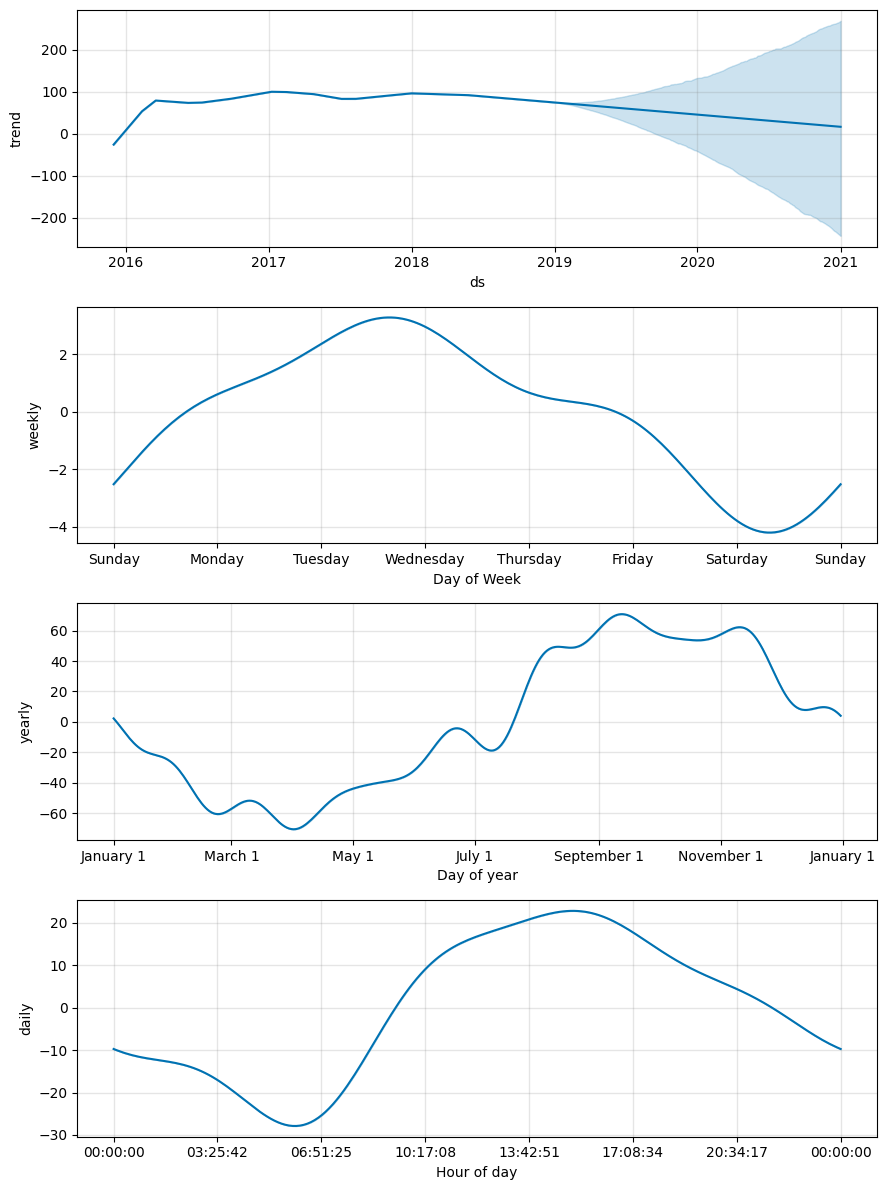

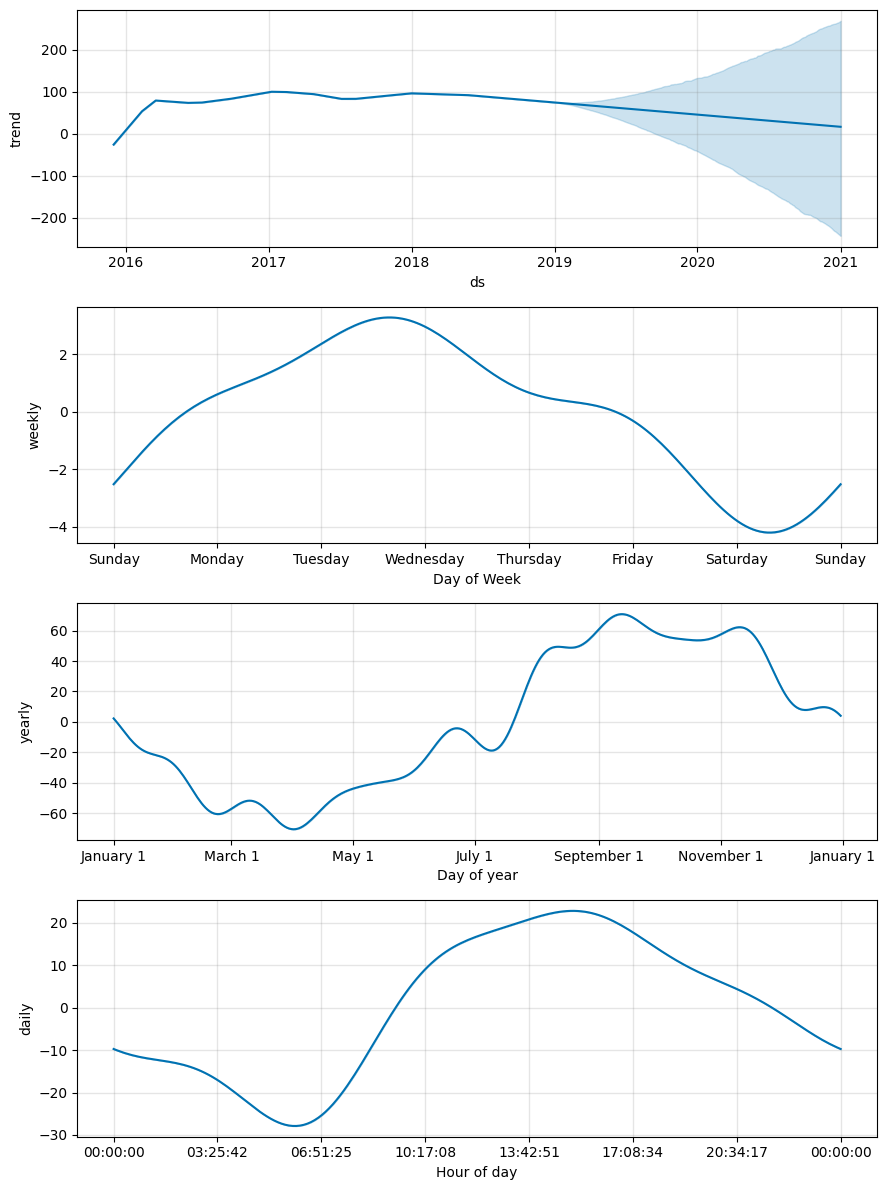

In [ ]:
figura3 = model2.plot_components(previsao2)


c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


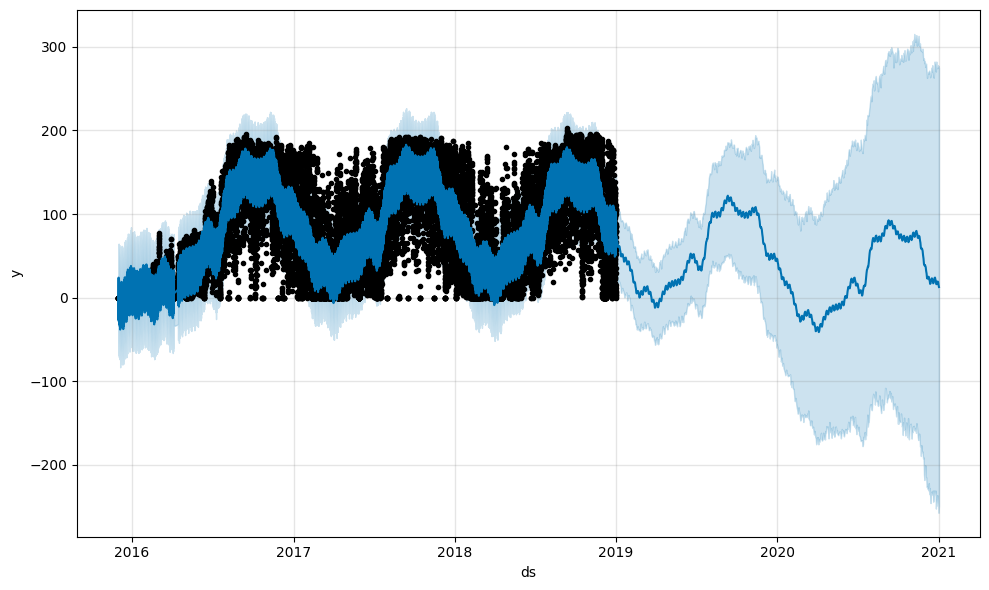

In [ ]:
figura4 = model2.plot(previsao2)